In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset

For this project, the dataset loaded is from the energy analysis data of 768 different building shapes. The data has eight independent variables and two dependent variables. The two dependent variables are the heating load and the cooling load of residential buildings. The features provided are the relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area and glazing area distribution

In [75]:
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
# X = df.iloc[:, :-1].values
# Y = df.iloc[:, 8:9].values

### Basic Data Exploration

The results of this basic exploration shows that the data has 768 rows and 10 clumns, the variables are all numerical in nature, and there are no missing values or duplicates.

In [25]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [26]:
data.shape

(768, 10)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [28]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [29]:
#Checking for null values
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [30]:
# Checking for duplicates
data.duplicated().sum()

0

### Exploratory data analysis

In [31]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
data = df.rename(columns=column_names)

In [32]:
#Confirm colum names
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Univariate Analysis

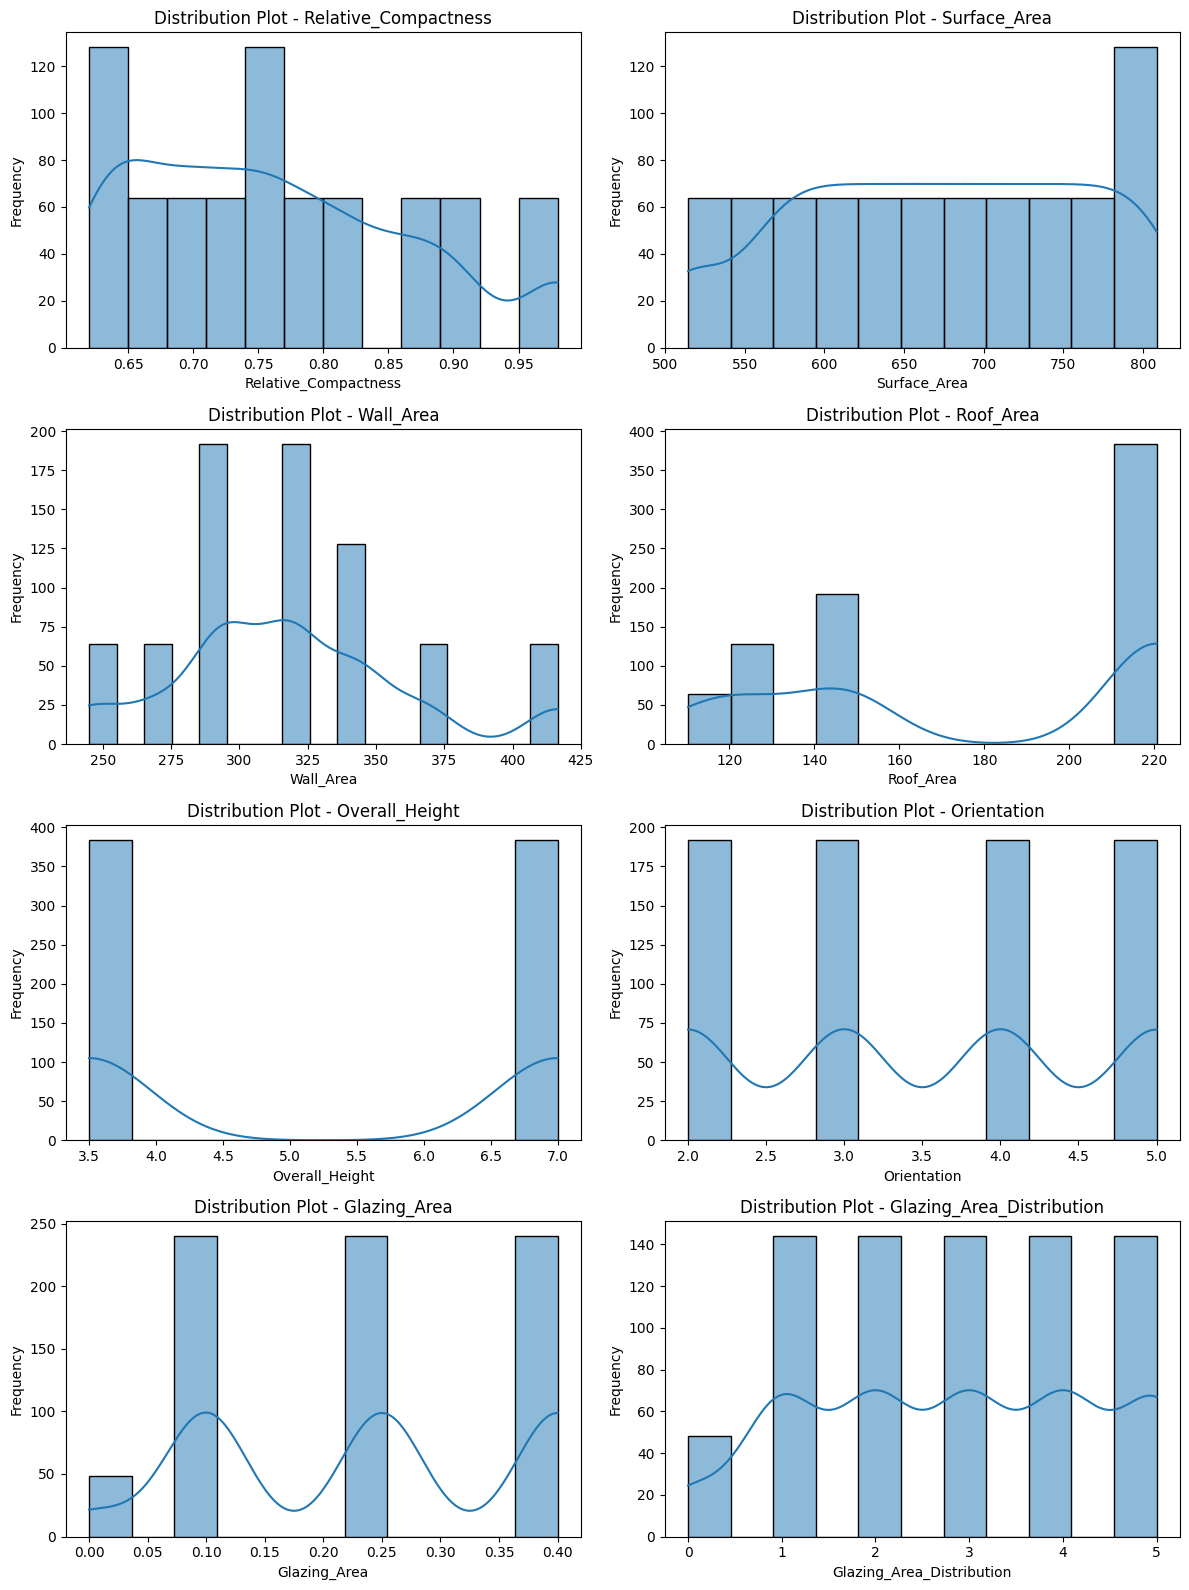

In [65]:
# Distribution plot of features
features = data.drop(['Heating_Load', 'Cooling_Load'], axis=1)
fig, ax = plt.subplots(4, 2, figsize=(12, 16))

for i, column in enumerate(features.columns[:8]):
    sns.histplot(ax=ax[i // 2, i % 2], x=column, data=features, kde=True)
    ax[i // 2, i % 2].set_title(f'Distribution Plot - {column}')
    ax[i // 2, i % 2].set_xlabel(column)
    ax[i // 2, i % 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

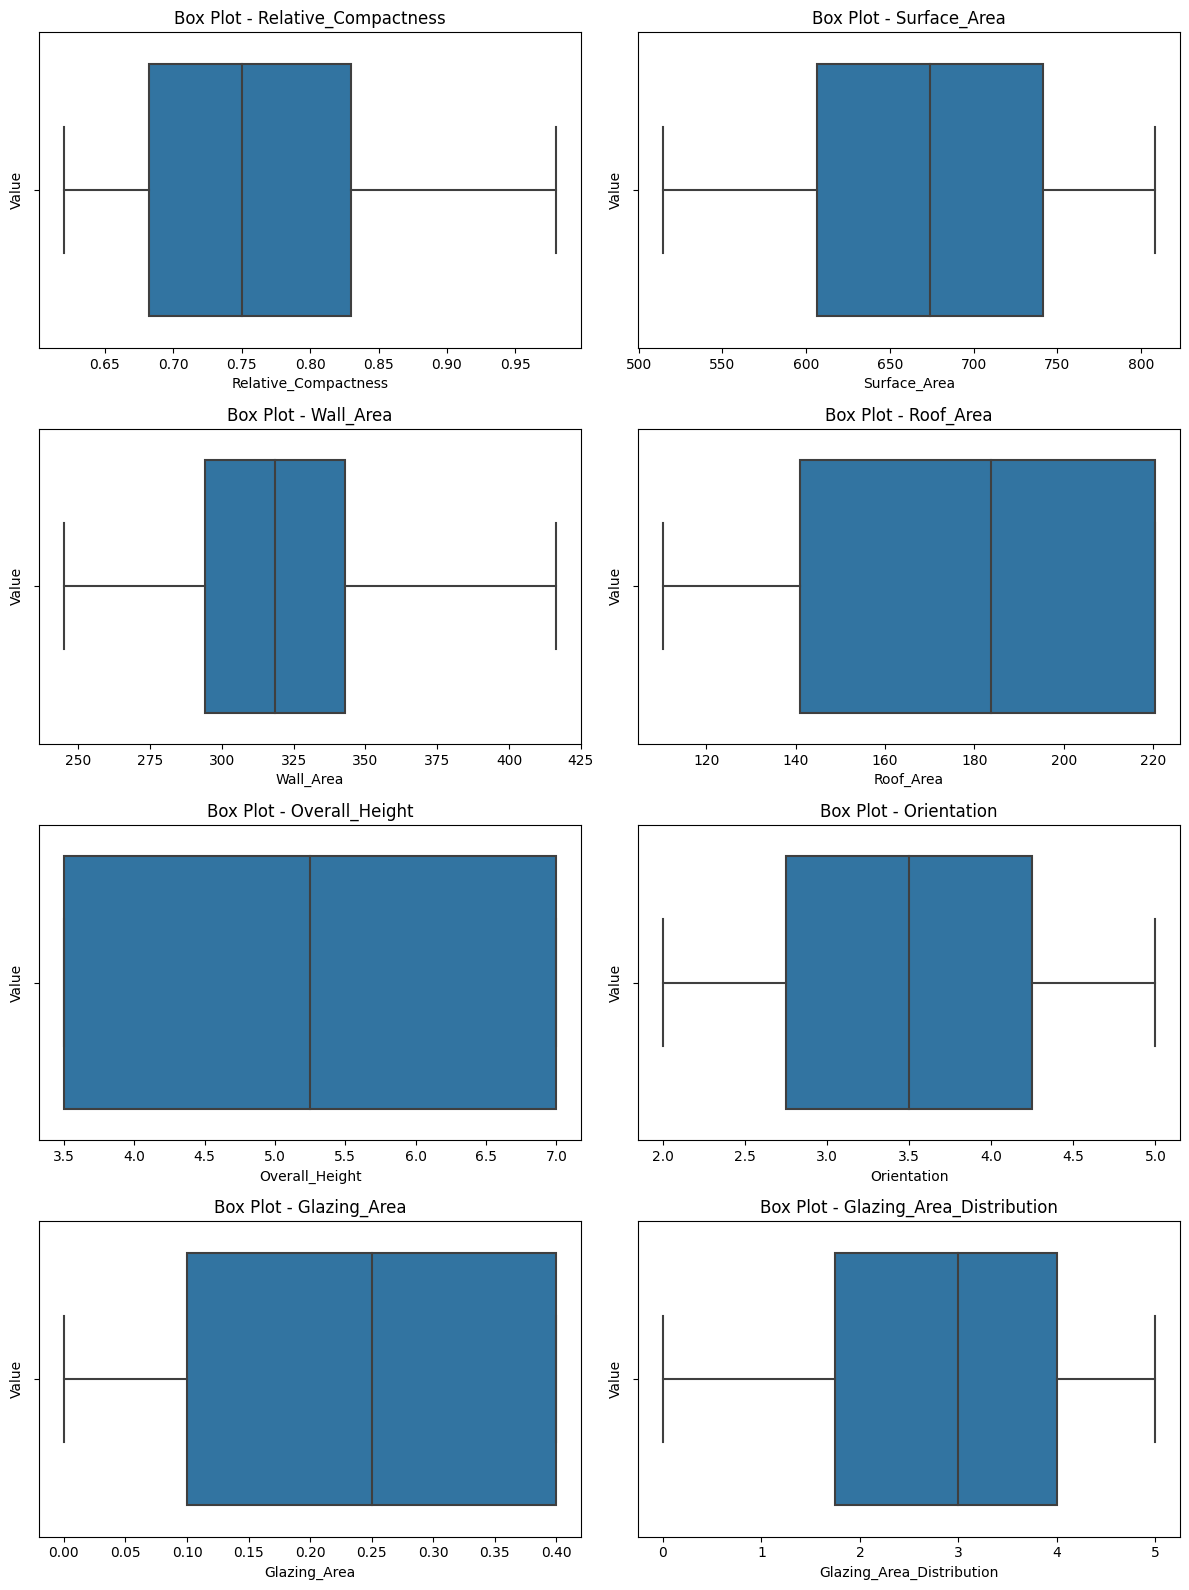

In [66]:
fig, ax = plt.subplots(4, 2, figsize=(12, 16))

for i, column in enumerate(features.columns[:8]):
    sns.boxplot(ax=ax[i // 2, i % 2], x=column, data=features)
    ax[i // 2, i % 2].set_title(f'Box Plot - {column}')
    ax[i // 2, i % 2].set_xlabel(column)
    ax[i // 2, i % 2].set_ylabel('Value')

plt.tight_layout()
plt.show()

### Bivariate analysis

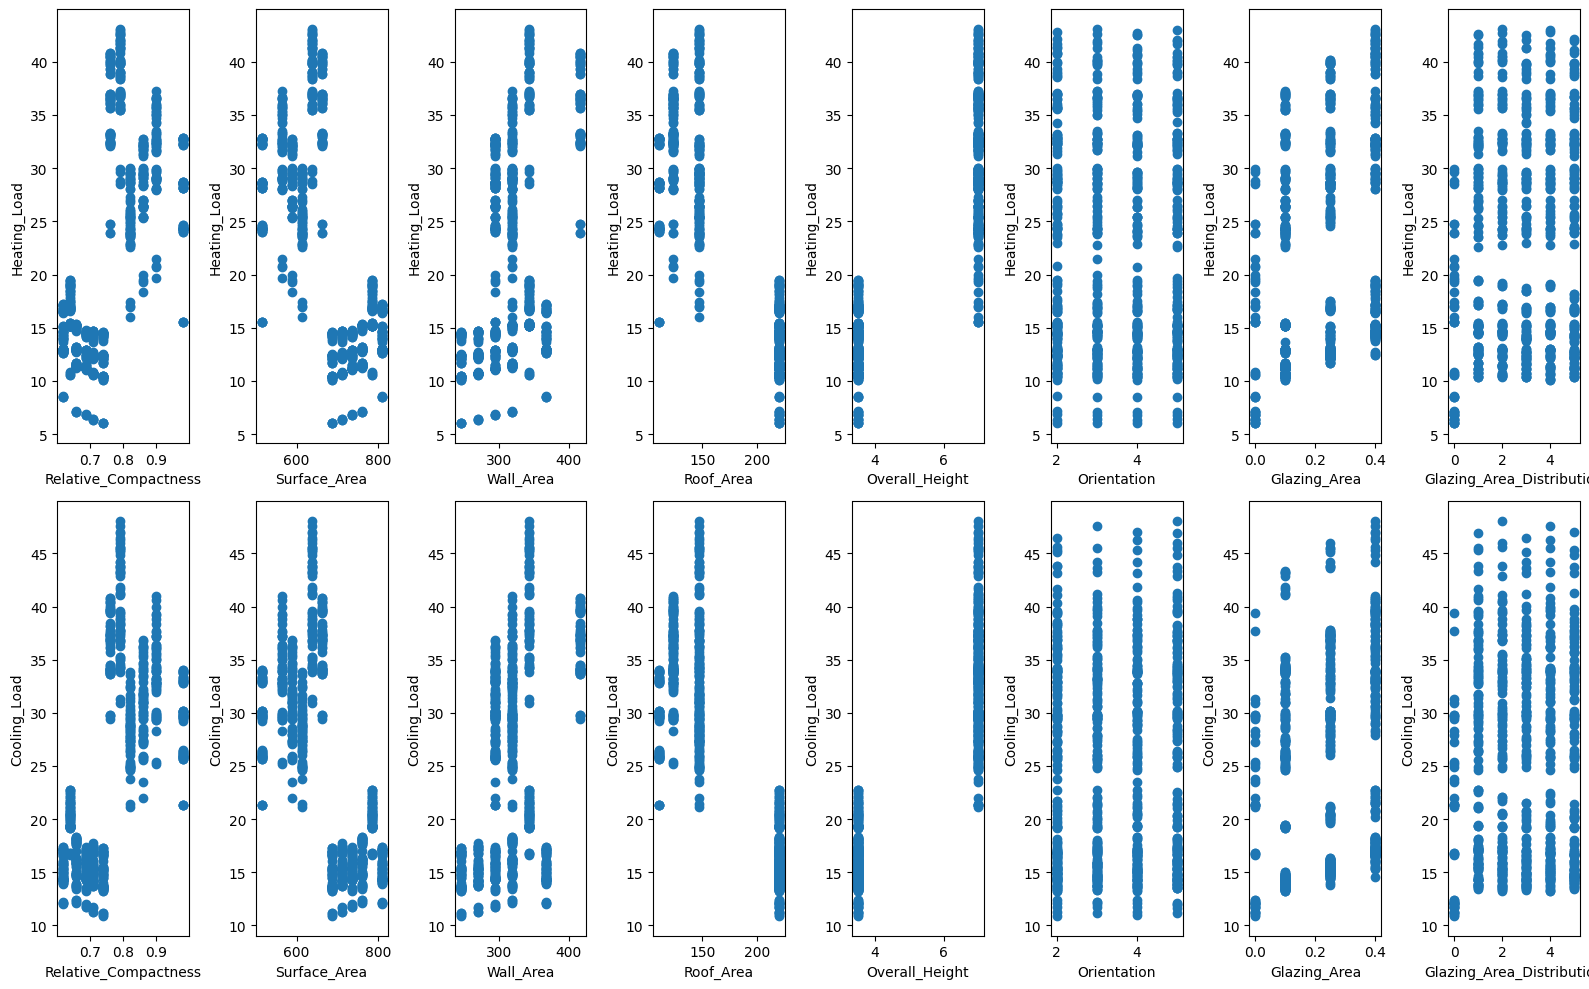

In [67]:
outputs = ['Heating_Load', 'Cooling_Load'] 
inputs = features.columns[:8]  


fig, ax = plt.subplots(len(outputs), len(inputs), figsize=(16, 10))


for i, variable in enumerate(outputs):
    for j, feature in enumerate(inputs):
        ax[i, j].scatter(features[feature], data[variable])
        ax[i, j].set_xlabel(feature)
        ax[i, j].set_ylabel(variable)

plt.tight_layout()
plt.show()

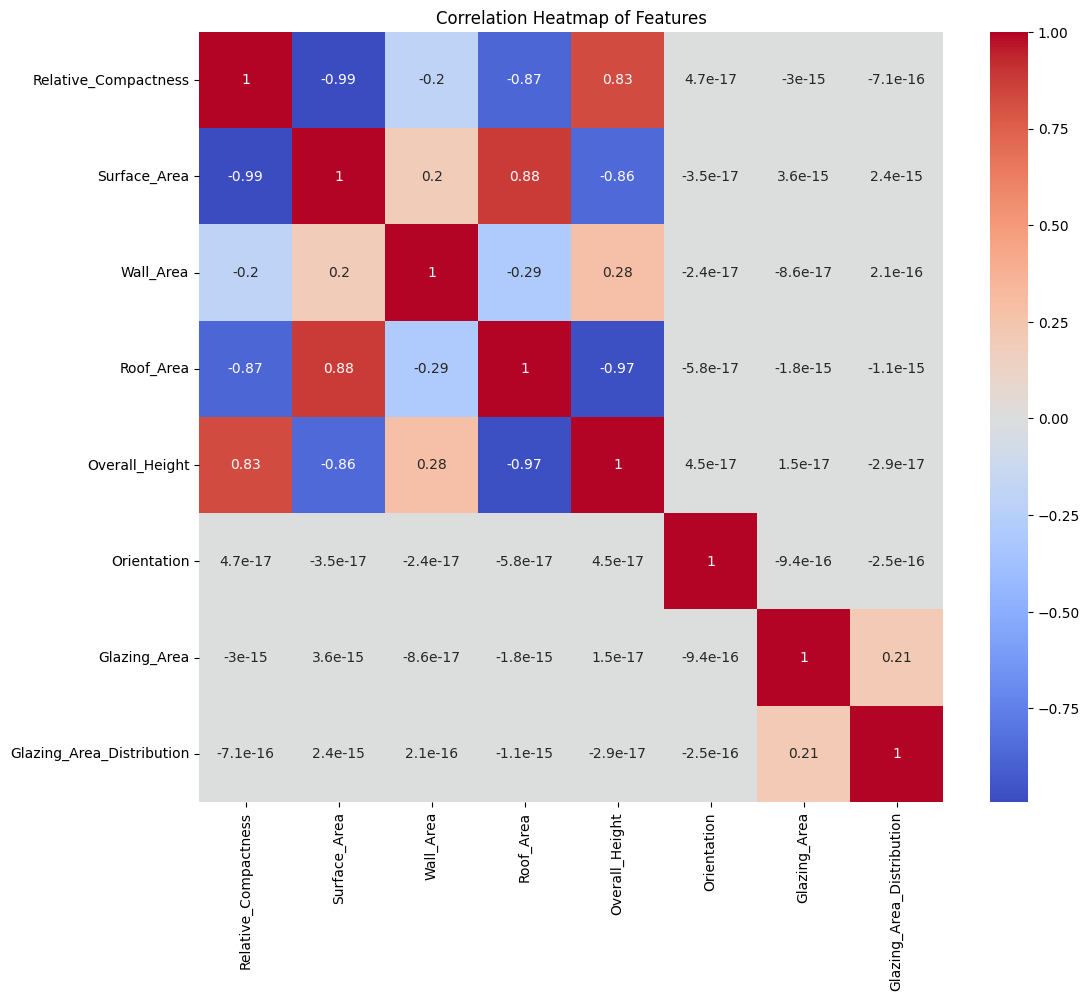

In [73]:
# Correlation matrix between feautres

plt.figure(figsize=(12, 10))  
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

### Data Preprocessing

In [74]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
features_data = normalised_data.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_data['Heating_Load']

### Splitting data

In [76]:
#Splitting the dataset into training and testing data .
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_data, heating_target,
test_size=0.3, random_state=1)


### Model building

In [79]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

#fitting the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression()

In [80]:
#obtain predictions
predicted_values = linear_model.predict(x_test)
predicted_values

array([0.18798828, 0.58032227, 0.74145508, 0.71411133, 0.76220703,
       0.24487305, 0.16601562, 0.61010742, 0.24560547, 0.5534668 ,
       0.31542969, 0.66088867, 0.6953125 , 0.29907227, 0.19165039,
       0.71850586, 0.5715332 , 0.31347656, 0.25732422, 0.74194336,
       0.70166016, 0.07373047, 0.61132812, 0.32373047, 0.21411133,
       0.74633789, 0.32836914, 0.18310547, 0.80102539, 0.27441406,
       0.68432617, 0.73510742, 0.13793945, 0.28857422, 0.57128906,
       0.80908203, 0.33203125, 0.13012695, 0.72509766, 0.2487793 ,
       0.8190918 , 0.15576172, 0.10522461, 0.16259766, 0.11938477,
       0.14819336, 0.48876953, 0.69189453, 0.75732422, 0.72045898,
       0.10180664, 0.66723633, 0.10205078, 0.24438477, 0.7644043 ,
       0.76928711, 0.73803711, 0.6340332 , 0.15576172, 0.29418945,
       0.18945312, 0.59375   , 0.60473633, 0.76586914, 0.56689453,
       0.92382812, 0.68237305, 0.31689453, 0.67211914, 0.23486328,
       0.54882812, 0.24584961, 0.23632812, 0.72924805, 0.29003

In [92]:
# Calculating the coefficients
print(linear_model.coef_)

[-6.06412485e-01  8.32211847e+12 -4.85456911e+12 -6.24158885e+12
  3.96484375e-01  4.57763672e-03  2.14851379e-01  3.21669579e-02]


In [82]:
# Calculating the regressor intercept
print(linear_model.intercept_)

1387019745463.9795


In [83]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [85]:
# Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.827

In [86]:
# Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.089

In [87]:
# R-Squared value
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) 

0.893

### Feature Importance

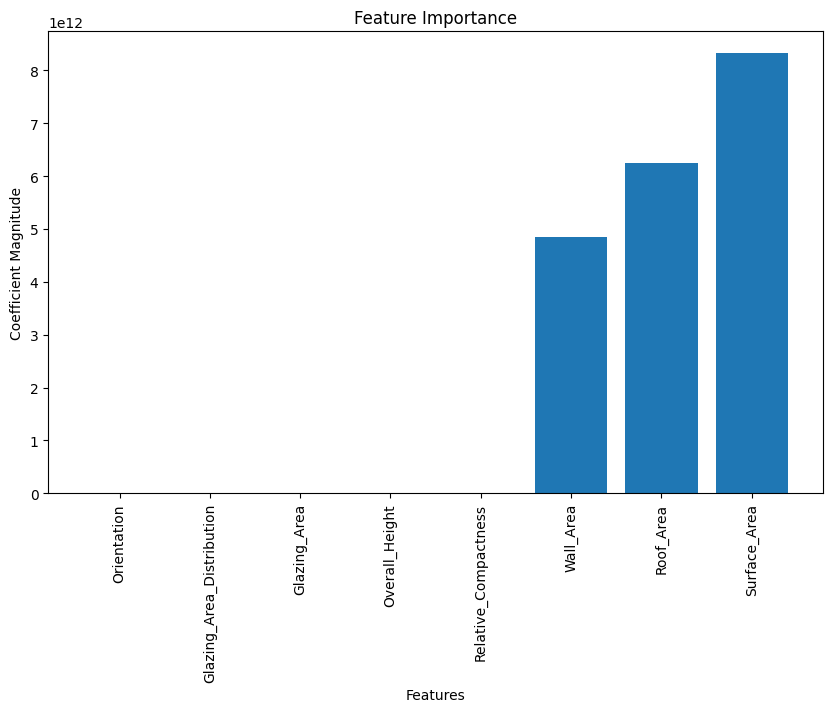

In [90]:
# Feature importance
coefficients = np.abs(linear_model.coef_)

feature_names = features_data.columns

indices = np.argsort(coefficients)

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients[indices])
plt.xticks(range(len(coefficients)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.show()

In [91]:
# Printing feature names and coefficients
for i in range(len(coefficients)):
    print(f'{feature_names[indices[i]]}: {coefficients[indices[i]]}')

Orientation: 0.00457763671875
Glazing_Area_Distribution: 0.03216695785522461
Glazing_Area: 0.21485137939453125
Overall_Height: 0.396484375
Relative_Compactness: 0.6064124847431488
Wall_Area: 4854569109121.603
Roof_Area: 6241588854585.252
Surface_Area: 8322118472779.66
